# Create Sub-saharan Africa polygon for sampling coordinates

## Setup and load data

In [24]:
from google.colab import files, drive
drive.mount('/content/drive')
! pip install geopandas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
! ls drive/MyDrive/detecting-poverty/data/shapes

lsib2021.cpg  lsib2021.prj  lsib2021.sbx  lsib2021.shp.xml
lsib2021.dbf  lsib2021.sbn  lsib2021.shp  lsib2021.shx


In [26]:
! mkdir data
! cp drive/MyDrive/detecting-poverty/data/shapes data/. -r
! ls data/shapes

mkdir: cannot create directory ‘data’: File exists
lsib2021.cpg  lsib2021.sbx	ssa_techpotential_offshorewind_shp.zip
lsib2021.dbf  lsib2021.shp	subsaharan-africa
lsib2021.prj  lsib2021.shp.xml
lsib2021.sbn  lsib2021.shx


In [94]:
import geopandas as gpd
from shapely.geometry import Point, box, mapping, shape, MultiPolygon, Polygon
import json

In [92]:
MultiPolygon

shapely.geometry.multipolygon.MultiPolygon

In [28]:
raw_countries = gpd.read_file('data/shapes')
print(raw_countries.shape)
raw_countries.columns

(278, 18)


Index(['OBJECTID', 'COUNTRY_NA', 'Shape_Leng', 'Shape_Le_1', 'Shape_Area',
       'InPoly_FID', 'SimPgnFlag', 'MinSimpTol', 'country_al', 'LSIB_name',
       'isoA2', 'isoA3', 'isoNumeric', 'ObjectID_1', 'xCentroid', 'yCentroid',
       'a3', 'geometry'],
      dtype='object')

In [29]:
raw_countries.sample(3)

,OBJECTID,COUNTRY_NA,Shape_Leng,Shape_Le_1,Shape_Area,InPoly_FID,SimPgnFlag,MinSimpTol,country_al,LSIB_name,isoA2,isoA3,isoNumeric,ObjectID_1,xCentroid,yCentroid,a3,geometry
16,162.0,Morocco,45.004223,44.963858,39.459415,90,0,0.05,Morocco,Morocco,MA,MAR,504.0,150,-6,32,MAR,"POLYGON ((-4.74870 35.22393, -4.29795 35.17080..."
81,30.0,Bouvet Island (Nor),0.401378,0.401378,0.007015,29,0,0.05,Bouvet Island,Bouvet Island (Nor),BV,BVT,74.0,30,3,-54,None,"POLYGON ((3.40575 -54.40086, 3.47908 -54.45003..."
217,201.0,Sao Tome & Principe,2.256503,2.256503,0.080428,210,0,0.05,Sao Tome and Principe,Sao Tome & Principe,ST,STP,678.0,194,7,0,None,"MULTIPOLYGON (((6.66114 0.41294, 6.74947 0.242..."


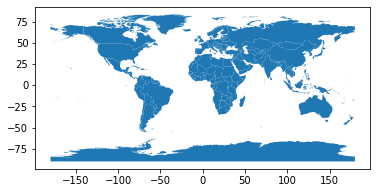

In [30]:
raw_countries.plot()

## Subset shapes and dissolve to single polygon

In [39]:
# from 
# https://heart.bmj.com/content/heartjnl/early/2018/03/13/heartjnl-2017-312384/DC1/embed/inline-supplementary-material-1.pdf?download=true
subsaharan_countries = [
    "AGO","BDI","BEN","BFA","BWA","CAF","CIV","CMR","COD","COG","COM","DJI",
    "ETH","GAB","GHA","GIN","GMB","GNB","GNQ","KEN","LBR","LSO","MOZ",
    "MWI","NAM","NGA","RWA","SEN","SLE","SOM","SWZ","TGO","TZA","UGA","ZAF",
    "ZMB","ZWE","SSD"
]

In [32]:
raw_countries.set_index("isoA3", inplace=True)

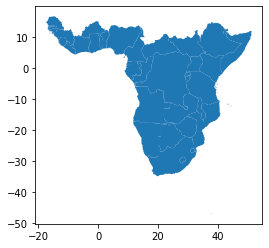

In [40]:
raw_countries.loc[subsaharan_countries,"geometry"].plot()

In [43]:
subsahara_shape = raw_countries.loc[subsaharan_countries,"geometry"].unary_union

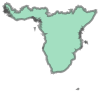

In [47]:
subsahara_shape

In [52]:
subsahara_shape.contains(Point(20,0))

True

In [59]:
minx, miny, maxx, maxy = subsahara_shape.bounds
print(minx, miny, maxx, maxy)

-17.529520034999962 -46.98186735699994 51.415031396000074 16.69295721700007


## Save shape

In [60]:
gpd.GeoSeries([subsahara_shape]).to_file('drive/MyDrive/detecting-poverty/data/subsahara.geojson', driver='GeoJSON')

In [115]:
type(subsahara_shape)

shapely.geometry.multipolygon.MultiPolygon

In [116]:
output = {
    "bbox" : [[minx, miny], [maxx, maxy]],
    "shape" : mapping(subsahara_shape)
}
with open("drive/MyDrive/detecting-poverty/data/subsahara_shapes.json", "w") as f:
    json.dump(output, fp=f)

In [105]:
with open("drive/MyDrive/detecting-poverty/data/subsahara_shapes.json", "r") as f:
    subsahara_test = json.load(f)
    shape_test = subsahara_test['shape']
    (minx, miny), (maxx, maxy) = subsahara_test['bbox']

print((minx, miny), (maxx, maxy))

(-17.529520034999962, -46.98186735699994) (51.415031396000074, 16.69295721700007)


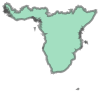

In [114]:
shape(shape_test)

## Sampling sample

In [61]:
import random

In [79]:
x = random.uniform(minx,maxx)
y = random.uniform(miny,maxy)
subsahara_shape.contains(Point(x, y))

True